# Es 11.1

Si richiede di fare pratica con la rete neurale fornitaci a lezioni variando il numero di epoche $N_{epocs}$, il numero di punti su cui fare il training $N_{trains}$ e l'errore $\sigma$ scon cui vengono valutati i punti di test.

La rete neurale presa in esame è del tipo:

genero i punti di train per la rete andando inoltre a definire dei punti ($x_{valid}$ e $y_{valid}$) che verranno usati sia per modellizzare il modello sia per la stima della loss con la curva esatta (implementata in $y_{target}$)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# generate training inputs
Ntrain=200
np.random.seed(0)
x_train = np.random.uniform(-1, 1, Ntrain)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

Creo la rete neurale (in questo caso con un solo layer di un solo neurone) e definisco le funzioni per caloclare la loss (ed evenutalmente l'accuratezza) del modello.

In [2]:
# compose the NN model
model = tf.keras.models.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


A questo punto alleno la rete coi punti di train per modellizzare i punti definiti valid per un numero di epoche scelto.

In [3]:
# fit the model using training dataset
# over N epochs of 32 batch size each
# report training progress against validation data
Nepocs=50
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=Nepocs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 200 samples, validate on 10 samples
Epoch 1/50
200/200 [==============================] - 0s 2ms/sample - loss: 1.0792 - mse: 1.0792 - val_loss: 0.7242 - val_mse: 0.7242
Epoch 2/50
200/200 [==============================] - 0s 113us/sample - loss: 0.8409 - mse: 0.8409 - val_loss: 0.5495 - val_mse: 0.5495
Epoch 3/50
200/200 [==============================] - 0s 107us/sample - loss: 0.6498 - mse: 0.6498 - val_loss: 0.4239 - val_mse: 0.4239
Epoch 4/50
200/200 [==============================] - 0s 190us/sample - loss: 0.5106 - mse: 0.5106 - val_loss: 0.3299 - val_mse: 0.3299
Epoch 5/50
200/200 [==============================] - 0s 180us/sample - loss: 0.4045 - mse: 0.4045 - val_loss: 0.2564 - val_mse: 0.2564
Epoch 6/50
200/200 [==============================] - 0s 130us/sample - loss: 0.3199 - mse: 0.3199 - val_loss: 0.2045 - val_mse: 0.2045
Epoch 7/50
200/200 [==============================] - 0s 140us/sample - loss: 0.2589 - mse: 0.2589 - val_loss: 0.1648 - val_mse: 0.1648
Epoch

A questo punto stampo il valore ottenuto a seguito dell'allenamento per la loss confrontandola col modello e con la curva esatta. In questo caso i valori risultano uguali in quanto ho posto $\sigma=0$ e pertanto i punti valid su cui viene valutato il modello sono esattamente quelli appartenenti alla curva.

In [4]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10/10 [==============================] - 0s 0s/sample - loss: 0.0018 - mse: 0.0018

Test loss: 0.0018434363882988691
Test accuracy: 0.0018434364


In [5]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10/10 [==============================] - 0s 0s/sample - loss: 0.0018 - mse: 0.0018

Test loss: 0.0018434363882988691
Test accuracy: 0.0018434364


Ora stampo l'andamento della loss in funzione del numero di epoche, si nota, ovviamente, che essa diminuisce all'aumentare del numero di epoche.

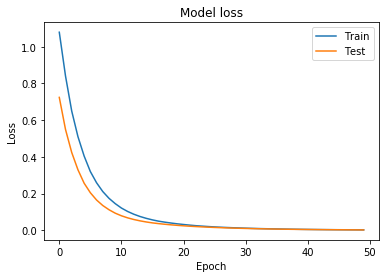

In [6]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Infine si fa un confronto tra la curva esatta (in blu) e i punti che vengono previsti dalla rete neurale (in rosso) di modo da verificare graficamente la correttezza della misura.

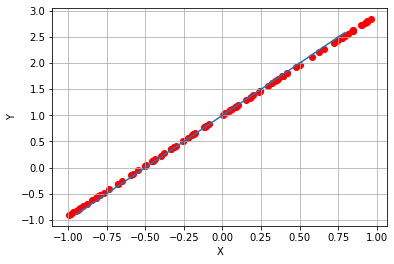

In [7]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

Veniamo ora alla consegna dell'esercizio, sono state effettuate diverse run di tale rete per verificare eventuali miglioramenti del fit.

Per prima cosa sono state fatte variare il numero di epoche. Si è osservato un netto miglioramento per quanto riguarda il parametro di loss; sono infatti passato da un valore per la loss di $loss=0.08283288776874542$ per $N_{epocs}=20$ a $loss=0.006545897573232651$ per $N_{epocs}=50$ in cui però si nota come tale valore sia fortmente influenzato dal numero di punti su cui viene fatto il train. 

Infatti con $N_{train}=100$ si osservano dei valori che cambiano da una run all'altra anche di valori importanti, per esempio per due run diverse con $N_{epocs}=50$ e $N_{train}=100$ ho ottenuto:

$$loss_{run 1}=0.006545897573232651 \quad loss_{run 2}=0.13881416618824005$$. 

Pertanto ho fissato il numero di epoche $N_{epocs}=50$ e ho cominciato a variare il numero di punti su cui effettuo il train. Sono passato da un $N_{train}=100$ a $N_{train}=200$ fino a $N_{train}=500$. Anche in questo caso si nota che il valore della loss diminuisca all'aumentare del numero di punti, e analogamente a prima si osserva come per pochi punti ci sia una variazione significativa della loss che diventa via via più consistente. Già a $N_{train}=200$ non si osservano variazioni troppo significative del valore della loss:

$$loss_{run 1}=0.0005146189942024648  \quad loss_{run 2}=0.0013102535158395767$$.

pertanto (anche in funzione di una diminuzione del tempo di prestazione) ho preferito procedere con $N_{train}=200$ anziche con $N_{train}=500$ su cui però si osservava maggior consistenza e minor valore di loss.

Infine ho variato il valore di $\sigma$ prendendo in esame $\sigma=0$, $\sigma=0.1$, $\sigma=0.25$ e $\sigma=0.5$. Si osserva un valore di loss crescente all'aumentare di $\sigma$:

$$loss_{\sigma=0}=0.0013102535158395767$$
$$loss_{\sigma=0.1}=0.009666286408901215$$
$$loss_{\sigma=0.25}=0.019817287102341652$$
$$loss_{\sigma=0.5}=0.02132287621498108$$

Questo è ovvio in quanto se il modello deve fare previsioni su dei punti ($x_{valid}$ e $y_{valid}$) che non sono perfettamente fittati esso farà previsioni peggiori. Pertanto, per questa simulazione, ho preferito procedere con $\sigma=0$.

# Es 11.2

Si richiede di migliorare la rete neurale precedente di modo da ottenere una stima ragionevole di un polinomio di ordine 3:
$$f(x)=4-3x-2x^2+3x^3$$
per $x \in [-1,1]$.

Si richiede inoltre di verificare il comportamento di tale stima al variare di:
- numero dei layer
- numero di neuroni in ogni layer
- funzione di attivazione
- ottimizzatore
- funzione di loss

Implmento la rete neurale presa in esame, analogamente all'esercizio precedente:

In [8]:
#parameters for f(x)=ax**3+bx**2+cx+d
a=3
b=-2
c=-3
d=4

# generate training inputs
np.random.seed(0)
Ntrain=350
x_train2 = np.random.uniform(-1, 1, Ntrain)
x_valid2 = np.random.uniform(-1, 1, 100)
x_valid2.sort()
y_target2 = a*x_valid2**3+b*x_valid2**2+c*x_valid2+d # ideal (target) linear function

sigma2 = 0.0 # noise standard deviation, for the moment it is absent
y_train2 = np.random.normal(a*x_train2**3+b*x_train2**2+c*x_train2+d, sigma) # actual measures from which we want to guess regression parameters
y_valid2 = np.random.normal(a*x_valid2**3+b*x_valid2**2+c*x_valid2+d, sigma)

In [9]:
# compose the NN model
model2 = tf.keras.models.Sequential()
model2.add(Dense(75, input_shape=(1,),activation='relu'))
model2.add(Dense(25,activation='relu'))
model2.add(Dense(3,activation='relu'))
model2.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 75)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1900      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 78        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 2,132
Trainable params: 2,132
Non-trainable params: 0
_________________________________________________________________


In [10]:
history2 = model2.fit(x=x_train2, y=y_train2, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid2, y_valid2))

Train on 350 samples, validate on 100 samples
Epoch 1/50
350/350 [==============================] - 0s 1ms/sample - loss: 6.2903 - mse: 6.2903 - val_loss: 1.5718 - val_mse: 1.5718
Epoch 2/50
350/350 [==============================] - 0s 71us/sample - loss: 0.8424 - mse: 0.8424 - val_loss: 0.7400 - val_mse: 0.7400
Epoch 3/50
350/350 [==============================] - 0s 90us/sample - loss: 0.5882 - mse: 0.5882 - val_loss: 0.6220 - val_mse: 0.6220
Epoch 4/50
350/350 [==============================] - 0s 125us/sample - loss: 0.5214 - mse: 0.5214 - val_loss: 0.5465 - val_mse: 0.5465
Epoch 5/50
350/350 [==============================] - 0s 114us/sample - loss: 0.4531 - mse: 0.4531 - val_loss: 0.4853 - val_mse: 0.4853
Epoch 6/50
350/350 [==============================] - 0s 142us/sample - loss: 0.4177 - mse: 0.4177 - val_loss: 0.4474 - val_mse: 0.4474
Epoch 7/50
350/350 [==============================] - 0s 201us/sample - loss: 0.3840 - mse: 0.3840 - val_loss: 0.4107 - val_mse: 0.4107
Epoch 

In [11]:
# evaluate model
score2 = model2.evaluate(x_valid2, y_valid2, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

100/100 [==============================] - 0s 87us/sample - loss: 0.0263 - mse: 0.0263

Test loss: 0.026338810846209527
Test accuracy: 0.02633881


In [12]:
# evaluate model with the exact curve
score2 = model2.evaluate(x_valid2, y_target2, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

100/100 [==============================] - 0s 199us/sample - loss: 0.0263 - mse: 0.0263

Test loss: 0.026338810846209527
Test accuracy: 0.02633881


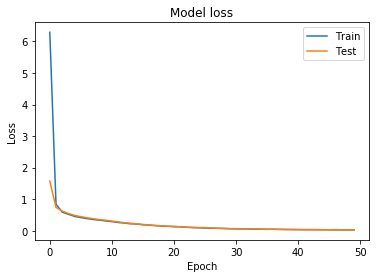

In [13]:
# look into training history
# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

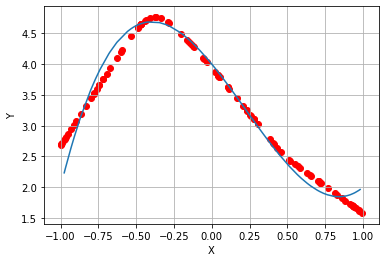

In [14]:
x_predicted2 = np.random.uniform(-1, 1, 100)
y_predicted2 = model2.predict(x_predicted2)
plt.scatter(x_predicted2, y_predicted2,color='r')
plt.plot(x_valid2, y_target2)
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

Per questa rete ho osservato che all'aumetare del numero di layer si osserva una miglior previsione della curva. Ho notato che già con 3 layer di neuroni si osserva un buon andamento della curva. Discorso analogo per il numero di neuroni, infatti ho osservato che se nel summary ho circa 2000 parametri su cui lavorare osservo un buon fit della curva.

Per quanto riguarda le funzioni di attivazione ho notato che in questo caso la funzione che mi da' i risultati migliori è la funzione RELU in tutti i layer. Per quanto riguarda le funzioni di ottimizzazione e di loss ho verificato che le migliori sono la SGD come ottimizzatore e la MSE come loss.

E' stato inoltre chiesto di verificare il comportamento della predizione in un intervallo esterno a quello calcolato nel train. Si mostra la cosa si è ottenuto come fit (si delimita in verde l'intervallo su cui è stato fatto il train):

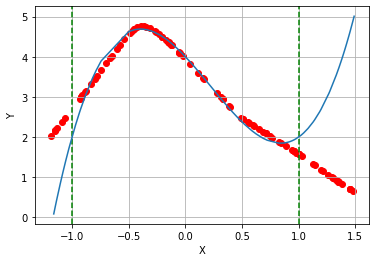

In [15]:
x_predicted22 = np.random.uniform(-1.2, 1.5, 100)
y_predicted22 = model2.predict(x_predicted22)
x_valid22 = np.random.uniform(-1.2, 1.5, 100)
x_valid22.sort()
y_target22 = a*x_valid22**3+b*x_valid22**2+c*x_valid22+d
plt.scatter(x_predicted22, y_predicted22,color='r')
plt.axvline(x=1, color='g', linestyle='--')
plt.axvline(x=-1, color='g', linestyle='--')
plt.plot(x_valid22, y_target22)
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

Si nota come all'esterno dell'intervallo non ci sia alcun tipo di match con la funzione ma la previsione proceda con un andamento rettilineo.

# Es 11.3

Si richiede di estendere la rete neurale di modo da fare previsioni su una funzione trigonometrica in 2D del tipo:
$$f(x,y) = \sin(x^2+y^2)$$
per $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$

In [16]:
from mpl_toolkits.mplot3d import Axes3D

# generate training inputs
np.random.seed(0)
ntrains3=450
nvalid3=200
x_train3 = np.zeros((ntrains3,2))
x_valid3 = np.zeros((nvalid3,2))
x_train3[:,0]=np.random.uniform(-3/2, 3/2, ntrains3)
x_train3[:,1]=np.random.uniform(-3/2, 3/2, ntrains3)
x_valid3[:,0]=np.random.uniform(-3/2, 3/2, nvalid3)
x_valid3[:,1]=np.random.uniform(-3/2, 3/2, nvalid3)

y_target3 = np.sin(x_valid3[:,0]**2+x_valid3[:,1]**2) # ideal (target) linear function

sigma3 = 0.0 # noise standard deviation
y_train3 = np.random.normal(np.sin(x_train3[:,0]**2+x_train3[:,1]**2), sigma3) # actual measures from which we want to guess regression parameters
y_valid3 = np.random.normal(np.sin(x_valid3[:,0]**2+x_valid3[:,1]**2), sigma)

In [17]:
# compose the NN model
model3 = tf.keras.models.Sequential()
model3.add(Dense(75, input_shape=(2,),activation='relu'))
model3.add(Dense(25,activation='relu'))
model3.add(Dense(3,activation='relu'))
model3.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 75)                225       
_________________________________________________________________
dense_6 (Dense)              (None, 25)                1900      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 78        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 4         
Total params: 2,207
Trainable params: 2,207
Non-trainable params: 0
_________________________________________________________________


In [18]:
history3 = model3.fit(x=x_train3, y=y_train3, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid3, y_valid3))

Train on 450 samples, validate on 200 samples
Epoch 1/50
450/450 [==============================] - 1s 2ms/sample - loss: 0.4245 - mse: 0.4245 - val_loss: 0.3382 - val_mse: 0.3382
Epoch 2/50
450/450 [==============================] - 0s 134us/sample - loss: 0.2762 - mse: 0.2762 - val_loss: 0.2294 - val_mse: 0.2294
Epoch 3/50
450/450 [==============================] - 0s 155us/sample - loss: 0.2041 - mse: 0.2041 - val_loss: 0.1959 - val_mse: 0.1959
Epoch 4/50
450/450 [==============================] - 0s 156us/sample - loss: 0.1737 - mse: 0.1737 - val_loss: 0.1666 - val_mse: 0.1666
Epoch 5/50
450/450 [==============================] - 0s 111us/sample - loss: 0.1534 - mse: 0.1534 - val_loss: 0.1579 - val_mse: 0.1579
Epoch 6/50
450/450 [==============================] - 0s 111us/sample - loss: 0.1463 - mse: 0.1463 - val_loss: 0.1605 - val_mse: 0.1605
Epoch 7/50
450/450 [==============================] - 0s 89us/sample - loss: 0.1431 - mse: 0.1431 - val_loss: 0.1547 - val_mse: 0.1547
Epoch

In [19]:
score3 = model3.evaluate(x_valid3, y_valid3, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

200/200 [==============================] - 0s 50us/sample - loss: 0.1322 - mse: 0.1322

Test loss: 0.13220748007297517
Test accuracy: 0.13220748


In [20]:
# evaluate model with the exact curve
score3 = model3.evaluate(x_valid3, y_target3, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

200/200 [==============================] - 0s 40us/sample - loss: 0.1322 - mse: 0.1322

Test loss: 0.13220748007297517
Test accuracy: 0.13220748


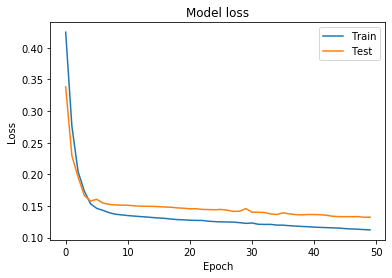

In [21]:
# look into training history
# Plot training & validation loss values
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

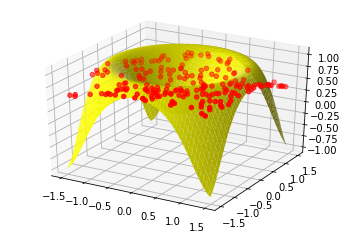

In [22]:
x_predicted3 = np.zeros((nvalid3 ,2))
x_predicted3[:,0] = np.random.uniform(-3/2, 3/2, nvalid3)
x_predicted3[:,1] = np.random.uniform(-3/2, 3/2, nvalid3)
y_predicted3 = model3.predict(x_predicted3)

x_prova=np.arange(nvalid3)*3/nvalid3-3/2
X, Y = np.meshgrid(x_prova, x_prova)
Z = np.sin(X**2+Y**2)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z,color='yellow')
ax.scatter3D(x_predicted3[:,0], x_predicted3[:,1], y_predicted3, color='r')
plt.grid(True)
plt.show()